In [131]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

fires_data = pd.read_csv("forest_fires_dataset.csv")
fires_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


| Column name | Description |
| --- | --- |
| X (integer) | x-axis spatial coordinate within the Montesinho park map: 1 to 9 |
| Y (integer) | y-axis spatial coordinate within the Montesinho park map: 2 to 9 |
| month (string) | month of the year: 'jan' to 'dec' |
| day (string) | day of the week: 'mon' to 'sun' |
| FFMC (float) | FFMC index from the FWI system: 18.7 to 96.20 |
| DMC (float) | DMC index from the FWI system: 1.1 to 291.3 |
| DC (float) | DC index from the FWI system: 7.9 to 860.6 |
| ISI (float) | ISI index from the FWI system: 0.0 to 56.10 |
| temp (float) | temperature in Celsius degrees: 2.2 to 33.30 |
| RH (float) | relative humidity in %: 15.0 to 100 |
| wind (float) | wind speed in km/h: 0.40 to 9.40 |
| rain (float) | outside rain in mm/m2 : 0.0 to 6.4 |
| area (float) | the burned area of the forest (in ha): 0.00 to 1090.84 |

In [94]:
fires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [95]:
fires_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Co najmniej 75% wartości w kolumnie "rain" jest równe 0.

W kolumnie celu (area) także jest bardzo dużo wartości równych lub bliskich 0.

In [96]:
fires_data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Super zbiór - nie ma brakujących danych :)

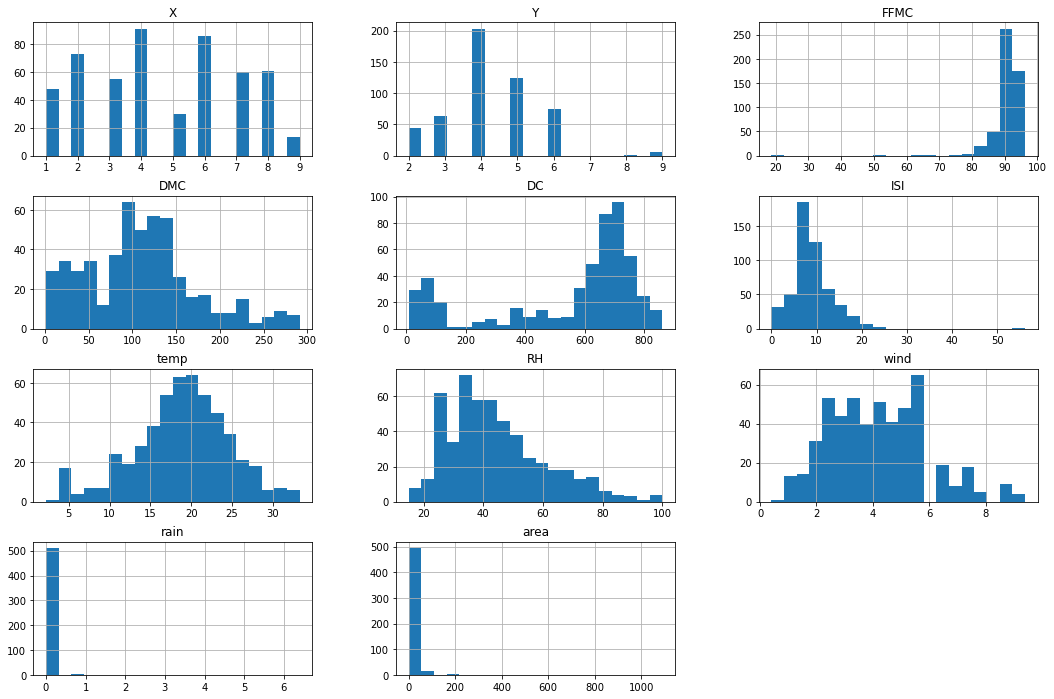

In [97]:
fires_data.hist(bins = 20, figsize = (18,12))
plt.show()

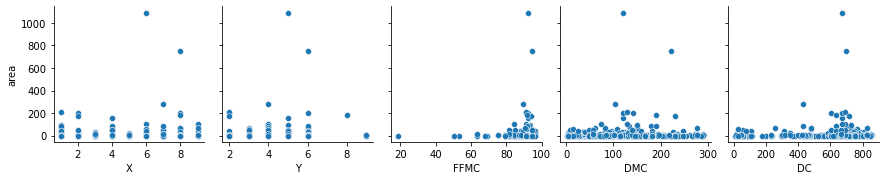

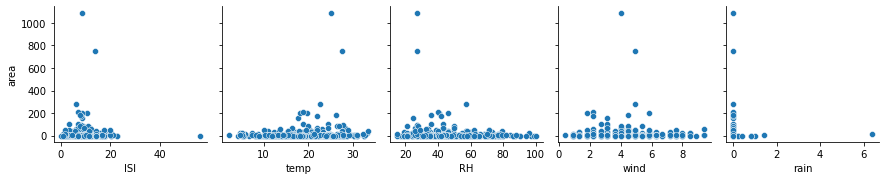

In [118]:
sns.pairplot(data, y_vars="area", x_vars=data.columns.values[[0,1,4,5,6]], diag_kind = None)
sns.pairplot(data, y_vars="area", x_vars=data.columns.values[[7,8,9,10,11]], diag_kind = None)

plt.show()

Spójrzmy teraz na liczbę pożarów względem dni tygodnia.

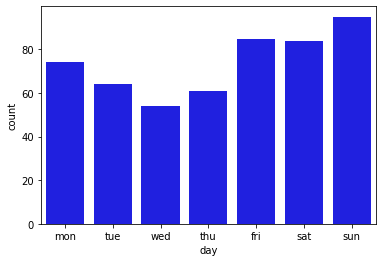

In [130]:
sns.countplot(x='day', data=data, order=["mon", "tue", "wed", "thu", "fri", "sat", "sun"], color = "blue")
plt.show()

Możemy w tym nawet znaleźć coś przypominającego rozkład normalny!

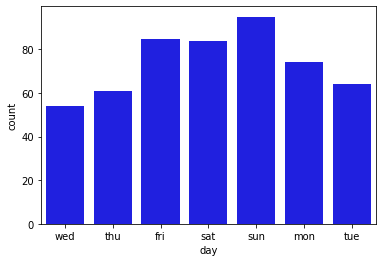

In [129]:
sns.countplot(x='day', data=data, order=["wed", "thu", "fri", "sat", "sun", "mon", "tue"], color = "blue")
plt.show()

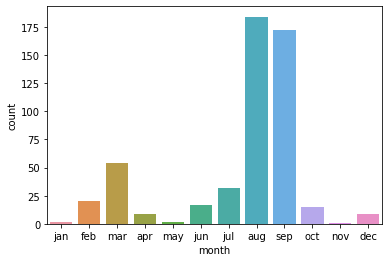

In [88]:
sns.countplot(x='month', data=data, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.show()

Zdecydowana większość pożarów jest w sierpniu i wrześniu.

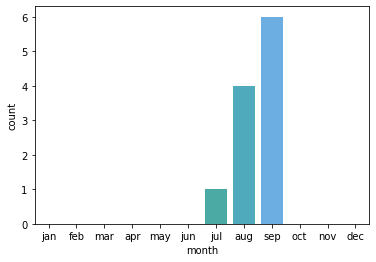

In [109]:
data_with_area = fires_data.loc[data["area"]>100]
sns.countplot(x='month', data=data_with_area, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.show()

Duże pożary (>100ha) tylko w miesiącach letnich.

In [135]:
profile = ProfileReport(fires_data, title='Profiling Report for Forest Fires Data')
profile.to_file("report.html")

Automatyczna eksploracja danych przy użyciu narzędzia pandas-profiling wydaje się całkiem przydatna - narzędzie to od razu daje dostęp do takich informacji jak liczba brakujących danych czy powtarzających się wierszy oszczędzając nam czasu. Bardzo spodobały mi się również sekcje "Interactions" oraz "Correlations", ponieważ podają od razu na tacy to, co i tak zawsze przy okazji EDA powinniśmy zrobić. Minusem tego narzędzia jest jednak dość długi czas generowania raportu, który dla większego zbioru danych byłby jeszcze większy, oraz brak możliwości formatowania wykresów - np. zmiany skali osi. 